In [154]:
import sklearn as skl
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing  
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
import sklearn
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
#from sklearn.cross_validation import train_test_split

# Data Exploration

In [155]:
# read csv file
df = pd.read_csv('../datasets/properties_data.csv')


In [156]:
# see first 5 lines
df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [157]:
# See lines and columns (lines,columns)
df.shape


(1905, 38)

In [158]:
# See types of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [159]:
# See number of different values of each attribute
df.nunique()

id                     1905
neighborhood             54
latitude                723
longitude               722
price                   821
size_in_sqft           1121
price_per_sqft         1784
no_of_bedrooms            6
no_of_bathrooms           6
quality                   4
maid_room                 2
unfurnished               2
balcony                   2
barbecue_area             2
built_in_wardrobes        2
central_ac                2
childrens_play_area       2
childrens_pool            2
concierge                 2
covered_parking           2
kitchen_appliances        2
lobby_in_building         2
maid_service              2
networked                 2
pets_allowed              2
private_garden            2
private_gym               2
private_jacuzzi           2
private_pool              2
security                  2
shared_gym                2
shared_pool               2
shared_spa                2
study                     2
vastu_compliant           2
view_of_landmark    

In [160]:
# See Stats of attribute Price 
df['price'].describe()

count    1.905000e+03
mean     2.085830e+06
std      2.913200e+06
min      2.200000e+05
25%      8.900000e+05
50%      1.400000e+06
75%      2.200000e+06
max      3.500000e+07
Name: price, dtype: float64

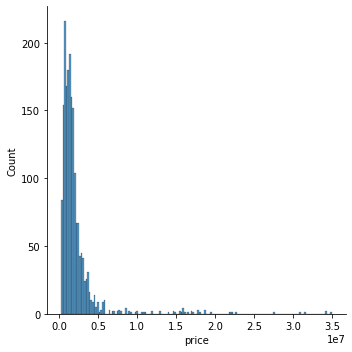

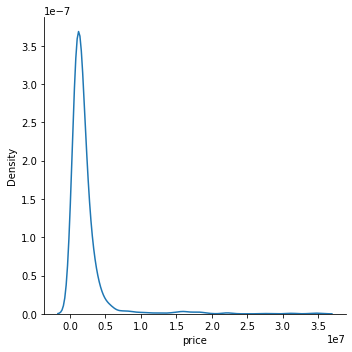

In [161]:
# See how prices are distributed
sns.displot(df,x="price")
sns.displot(df,x="price",kind="kde")

In [162]:
# Check for missing values or duplicated data
print(df.isna().sum())
print(df.duplicated().sum())

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64
0


In [163]:

#_ , ax = plt.subplot()
#sns.boxplot(x=df["price"],y=df["neighborhood"])

<AxesSubplot:>

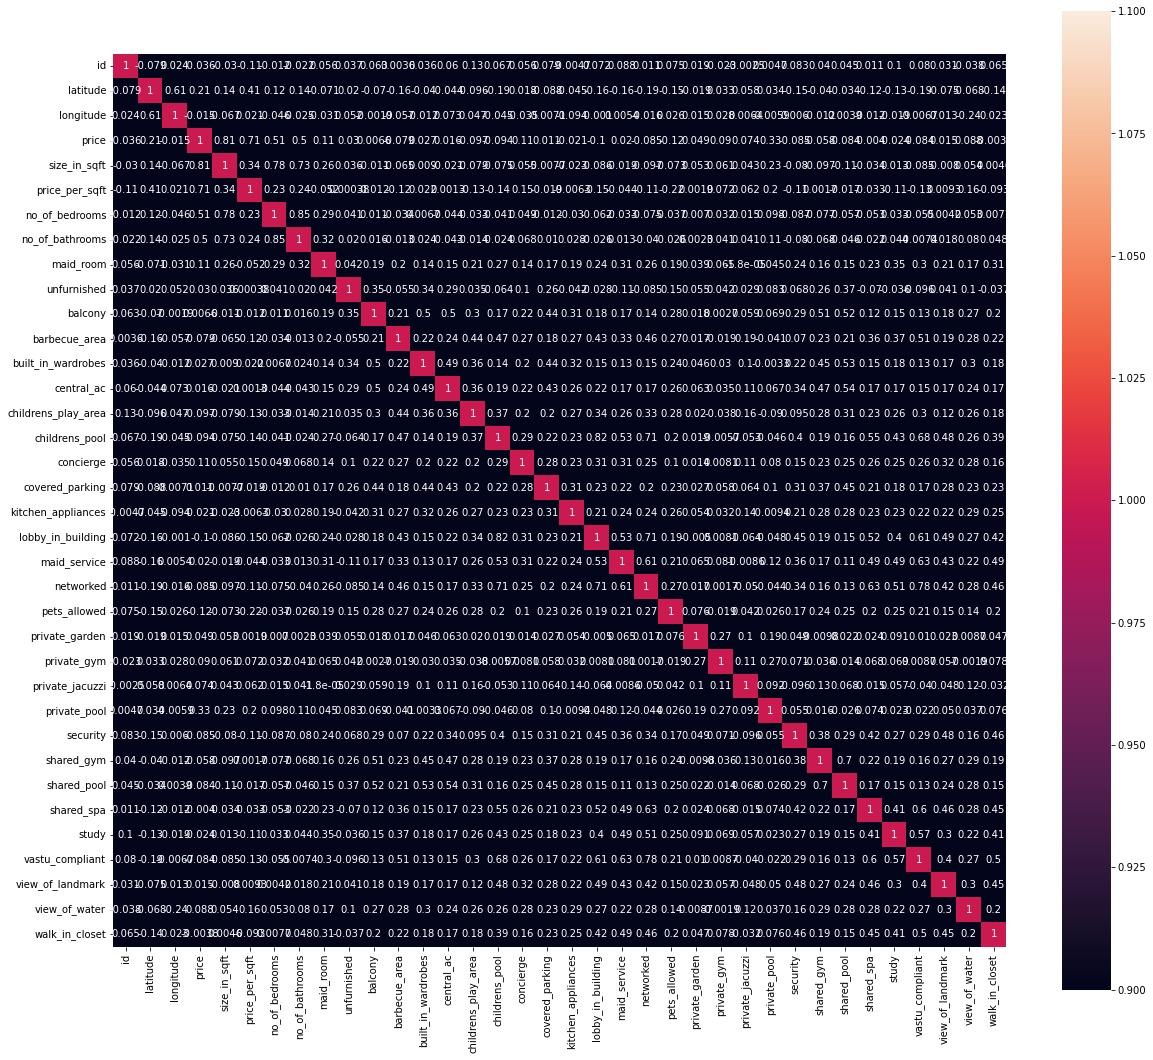

In [164]:
# correlation of data
corr_matrix = df.corr()
f,ax = plt.subplots(figsize=(20,18))
sns.heatmap(corr_matrix,vmin=1,vmax=1,square=True,annot=True)


# Data preparation

In [165]:
# rename columns
df.rename(columns={"study":"study_area"}, inplace=True)

# drop columns
df.drop(['id','latitude', 'longitude','quality','vastu_compliant'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighborhood         1905 non-null   object 
 1   price                1905 non-null   int64  
 2   size_in_sqft         1905 non-null   int64  
 3   price_per_sqft       1905 non-null   float64
 4   no_of_bedrooms       1905 non-null   int64  
 5   no_of_bathrooms      1905 non-null   int64  
 6   maid_room            1905 non-null   bool   
 7   unfurnished          1905 non-null   bool   
 8   balcony              1905 non-null   bool   
 9   barbecue_area        1905 non-null   bool   
 10  built_in_wardrobes   1905 non-null   bool   
 11  central_ac           1905 non-null   bool   
 12  childrens_play_area  1905 non-null   bool   
 13  childrens_pool       1905 non-null   bool   
 14  concierge            1905 non-null   bool   
 15  covered_parking      1905 non-null   b

In [166]:
# Transform Bool columns to Int
df = df.astype({'maid_room':int,'unfurnished':int,'balcony':int,'barbecue_area':int,
'built_in_wardrobes':int,'central_ac':int,'childrens_play_area':int,'childrens_pool':int,
'concierge':int,'covered_parking':int,'kitchen_appliances':int,'lobby_in_building':int,
'maid_service':int,'networked':int,'pets_allowed':int,'private_garden':int,'private_gym':int,
'private_jacuzzi':int,'private_pool':int,'security':int,'shared_gym':int,'shared_pool':int,
'shared_spa':int,'study_area':int,'view_of_landmark':int,'view_of_water':int,'walk_in_closet':int})
df.head()

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,...,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study_area,view_of_landmark,view_of_water,walk_in_closet
0,Palm Jumeirah,2700000,1079,2502.32,1,2,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
1,Palm Jumeirah,2850000,1582,1801.52,2,2,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
2,Jumeirah Lake Towers,1150000,1951,589.44,3,5,1,1,1,0,...,1,0,1,1,1,0,0,1,1,1
3,Culture Village,2850000,2020,1410.89,2,3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Palm Jumeirah,1729200,507,3410.65,0,1,0,0,0,0,...,0,0,1,1,1,1,0,1,1,0


In [167]:
#Label Enconding da Neighborhood
label_encoder = preprocessing.LabelEncoder()
df['neighborhood']= label_encoder.fit_transform(df['neighborhood'])

In [168]:
df['neighborhood'].unique()

array([46, 36, 11, 15, 22,  9, 45,  3, 39,  6, 34, 16, 30, 10,  2, 12, 35,
       33, 20, 51, 43, 13, 37,  7,  0, 23, 48, 49, 27, 25, 38, 42, 18,  8,
       31, 28, 40, 50, 29,  1,  5, 17, 32, 21, 52, 44, 14, 47, 41, 26, 19,
       53, 24,  4])

# Create model

In [169]:
#y são os valores dos imoveis que queremos prever no price
y = df['price'].to_frame()

In [170]:
x = df.drop(['price'],axis=1)

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [172]:
#Regressão Linear - Opção 1
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [173]:
#Model Evaluation
coeff_df = pd.DataFrame(lm.coef_[0], x.columns, columns=['Coefficient'])
print(coeff_df)

                       Coefficient
neighborhood           5765.455585
size_in_sqft           2620.587635
price_per_sqft         2154.702198
no_of_bedrooms      -572518.365046
no_of_bathrooms      -84309.839178
maid_room           -312117.841992
unfurnished           46808.530895
balcony              108513.224020
barbecue_area         36347.543583
built_in_wardrobes     -686.244471
central_ac           118465.336769
childrens_play_area   87942.950690
childrens_pool       130625.447347
concierge            -50279.608115
covered_parking       90054.121907
kitchen_appliances   -73198.490974
lobby_in_building    107588.633038
maid_service         407425.366694
networked           -178700.141964
pets_allowed         249945.156541
private_garden      -149286.000915
private_gym         -548417.119840
private_jacuzzi      283458.310709
private_pool         975659.489863
security             -85526.859679
shared_gym           -44593.373900
shared_pool         -175502.616862
shared_spa          

In [174]:
predictions = lm.predict(x_test)
#MAE
metrics.mean_absolute_error(y_test,predictions)

602652.5552764089

In [175]:
#MSE
metrics.mean_squared_error(y_test, predictions)

759564415930.0625

In [176]:
#RMSE
np.sqrt(metrics.mean_squared_error(y_test, predictions))

871529.9283042795

In [177]:
# Árvores de Decisão (Regressão) - Opção 2
df_model = SVC(random_state=1)
df_model.fit(x_train, np.ravel(y_train))
dtr = DecisionTreeRegressor(random_state=1)

In [178]:
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

TypeError: __init__() got an unexpected keyword argument 'presort'

In [ ]:
#sklearn decision trees não conseguem lidar com dados categóricos
#considerar latitude e longitude em vez de neighborhood

In [ ]:
#para ver como funciona
print(x_test.head())
print(df_model.predict(x_test.head(10)))

      neighborhood  size_in_sqft  price_per_sqft  no_of_bedrooms  \
1010            49          1477         1083.28               2   
137             25          1800          477.78               2   
285             34           640         2406.25               1   
1381            37          1575          755.87               3   
1723            21          1057          373.70               1   

      no_of_bathrooms  maid_room  unfurnished  balcony  barbecue_area  \
1010                2          0            1        1              0   
137                 3          0            1        1              1   
285                 2          0            1        1              0   
1381                3          1            1        1              0   
1723                2          0            1        1              0   

      built_in_wardrobes  ...  private_jacuzzi  private_pool  security  \
1010                   0  ...                0             0         1   
137 

In [ ]:
#medir a qualidade do modelo
#Quanto menor, melhor. MAE é a melhor metrica a ser usada
predicted_home_prices = df_model.predict(x_test)
metrics.mean_absolute_error(y_test,predicted_home_prices)

554009.1174004193

In [ ]:
confusion_matrix(y_test, predicted_home_prices)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
accuracy_score(y_test, predicted_home_prices)

0.018867924528301886

In [ ]:
precision_score(y_test, predicted_home_prices, average=None, zero_division=1)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
recall_score(y_test, predicted_home_prices, average=None, zero_division=1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.